In [95]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [96]:
df = pd.read_csv("loan_approval_data.csv")
df.info()    # Get all the info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

In [97]:
df.isnull().sum()    # So 50 null values are present in each Column

Applicant_ID          50
Applicant_Income      50
Coapplicant_Income    50
Employment_Status     50
Age                   50
Marital_Status        50
Dependents            50
Credit_Score          50
Existing_Loans        50
DTI_Ratio             50
Savings               50
Collateral_Value      50
Loan_Amount           50
Loan_Term             50
Loan_Purpose          50
Property_Area         50
Education_Level       50
Gender                50
Employer_Category     50
Loan_Approved         50
dtype: int64

In [98]:
df.describe()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,501.220000,10852.571579,5082.455789,39.971579,1.474737,676.033684,1.950526,0.347263,9940.452632,24802.792632,20522.825263,48.000000
std,289.608451,5061.632859,2943.161570,11.139797,1.105067,71.346015,1.406246,0.144341,5860.736885,14345.696031,11504.142575,24.245322
min,1.000000,2009.000000,1.000000,21.000000,0.000000,550.000000,0.000000,0.100000,65.000000,36.000000,1015.000000,12.000000
25%,250.250000,6730.750000,2472.750000,30.250000,1.000000,616.250000,1.000000,0.220000,4760.250000,12698.250000,9806.250000,24.000000
50%,499.500000,10548.000000,5205.500000,40.000000,1.000000,678.000000,2.000000,0.340000,9880.500000,24321.000000,21210.500000,48.000000
75%,752.750000,15190.000000,7620.750000,49.000000,2.000000,737.000000,3.000000,0.480000,15074.500000,36947.000000,30263.000000,72.000000
max,1000.000000,19988.000000,9996.000000,59.000000,3.000000,799.000000,4.000000,0.600000,19996.000000,49954.000000,39995.000000,84.000000


# Handle Missing Values


In [99]:
# If the missing value is "Numerical"  => Use mean ( prefered )  or mode 
# If the missing value is "categorical" => Use Majority wins ( Funda ) 

categorical_cols = df.select_dtypes(include=["object"]).columns    # This will give all the caategorical Columns
numerical_cols = df.select_dtypes(include=["float64","int64","number"]).columns      # This will give all the numerical Columns  ( Instead of passing float64 and all we can just pass "Number" also )
total_size = categorical_cols.size + numerical_cols.size

In [100]:
from sklearn.impute import SimpleImputer    # Search Sklearn Imputer   ( It is used to fill missing values with simple strategies )

# To fill the values ( Will create a Imputer ) 
num_imp = SimpleImputer(strategy="mean")
df[numerical_cols] = num_imp.fit_transform(df[numerical_cols])
df

cat_imp = SimpleImputer(strategy="most_frequent")
df[categorical_cols] = cat_imp.fit_transform(df[categorical_cols])
df

df.isnull().sum()

Applicant_ID          0
Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

# Exploratory Data Analysis   ( EDA )

Text(0.5, 1.0, 'Is Loan approved or not?')

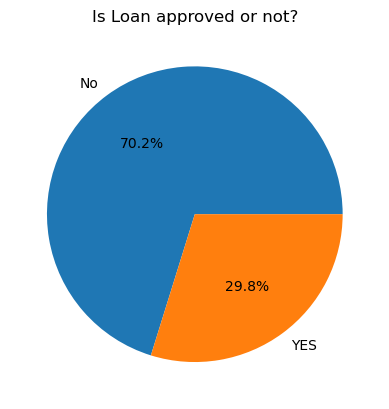

In [101]:
# To understand patterns in the Data

# 1. How balanced our classes are ?

classes_count = df["Loan_Approved"].value_counts()
classes_count

# # PI Chart   ( For Categorical Data ) 
plt.pie(classes_count, labels=["No", "YES"] , autopct = "%1.1f%%")
plt .title("Is Loan approved or not?")

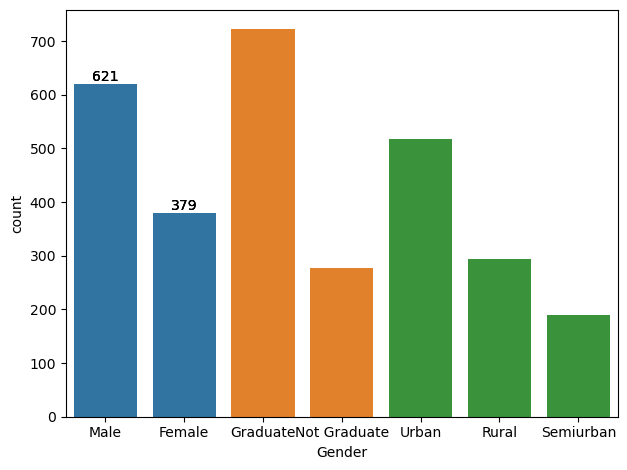

In [102]:
# 2. Analyse Categories

# a. Gender
gender_cnt = df["Gender"].value_counts()
ax = sns.barplot(gender_cnt)
ax.bar_label(ax.containers[0])

# b. Education Level
edu_cnt = df["Education_Level"].value_counts()
ax = sns.barplot(edu_cnt)
ax.bar_label(ax.containers[0])

# c. Property Area
edu_cnt = df["Property_Area"].value_counts()
ax = sns.barplot(edu_cnt)
ax.bar_label(ax.containers[0])

plt.tight_layout()

<Axes: xlabel='Applicant_Income', ylabel='Count'>

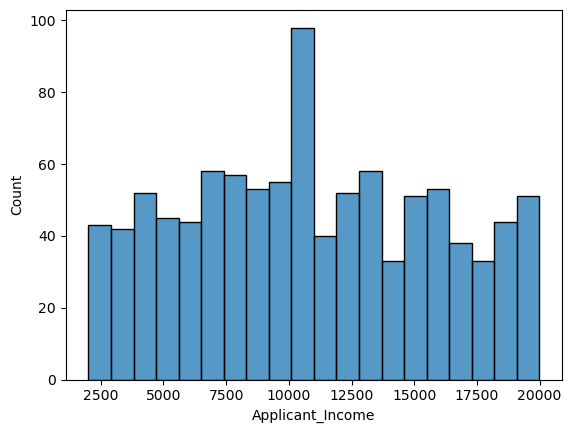

In [103]:
# 3. Analyse Income

sns.histplot (
    data = df,
    x = "Applicant_Income",
    bins = 20
)

<Axes: xlabel='Coapplicant_Income', ylabel='Count'>

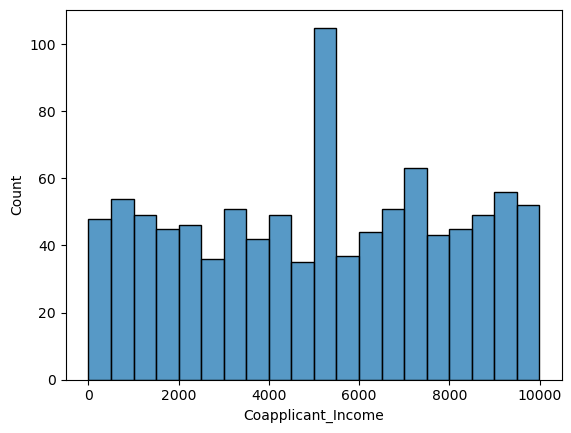

In [104]:
sns.histplot (
    data = df,
    x = "Coapplicant_Income",
    bins = 20
)

In [105]:
df


,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.000000,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.000000,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.000000,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.000000,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,3.0,7390.000000,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.000000,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,4.0,13964.000000,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.000000,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.000000,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.000000,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996.0,10852.571579,9092.0,Salaried,58.0,Married,0.0,557.0,0.0,0.59,5370.000000,43563.0,8311.0,72.0,Personal,Urban,Not Graduate,Male,Unemployed,No
996,997.0,3279.000000,6356.0,Self-employed,58.0,Married,1.0,646.0,3.0,0.19,9940.452632,18361.0,22563.0,12.0,Business,Urban,Graduate,Female,Government,No
997,998.0,15192.000000,8433.0,Contract,48.0,Single,1.0,666.0,1.0,0.40,8581.000000,41335.0,16203.0,24.0,Home,Rural,Graduate,Male,MNC,No
998,999.0,9083.000000,7380.0,Unemployed,50.0,Single,1.0,748.0,3.0,0.31,13491.000000,8933.0,10290.0,36.0,Personal,Urban,Graduate,Male,Private,Yes


<Axes: xlabel='Loan_Approved', ylabel='Applicant_Income'>

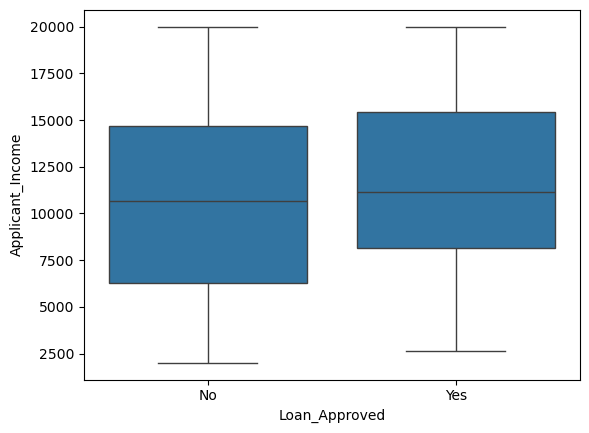

In [106]:
# Outliers - Box Plots

sns.boxplot  (
    data = df,
    x = "Loan_Approved",
    y = "Applicant_Income"
)

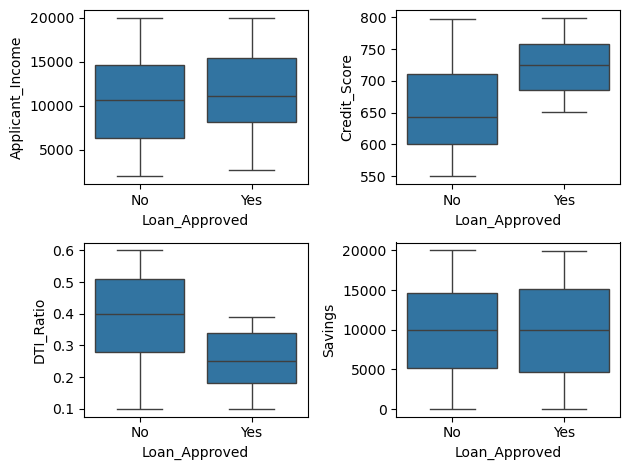

In [107]:
fig, axes = plt.subplots(2,2)

sns.boxplot(ax = axes[0,0], data = df, x = "Loan_Approved", y = "Applicant_Income")
sns.boxplot(ax = axes[0,1], data = df, x = "Loan_Approved", y = "Credit_Score")
sns.boxplot(ax = axes[1,0], data = df, x = "Loan_Approved", y = "DTI_Ratio")
sns.boxplot(ax = axes[1,1], data = df, x = "Loan_Approved", y = "Savings")
plt.tight_layout()

<Axes: xlabel='Credit_Score', ylabel='Count'>

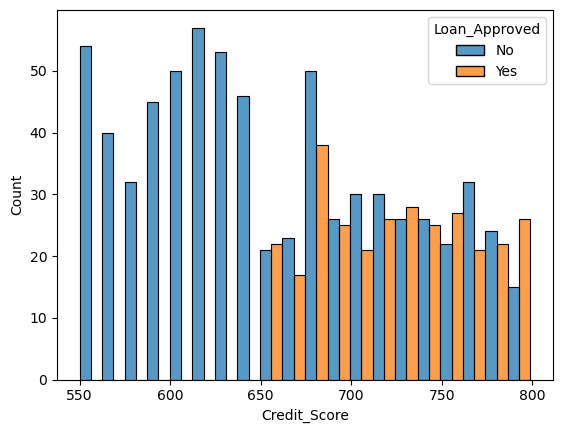

In [108]:
# Relation of Cradit_Score with Loan_Approved

sns.histplot(
    data = df,
    x = "Credit_Score",
    hue = "Loan_Approved",
    bins = 20,
    multiple="dodge"
)

# One Conclusion   =>  Cradit Score is being Most Important ( From below Graph )

<Axes: xlabel='Applicant_Income', ylabel='Count'>

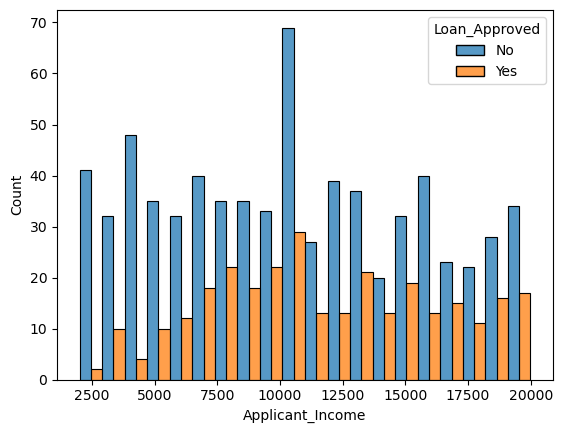

In [109]:
sns.histplot(
    data = df,
    x = "Applicant_Income",
    hue = "Loan_Approved",
    bins = 20,
    multiple="dodge"
)

# Note : We are just analysing how each input affects the output ( Which feature can be the most impactful feature and so on )

In [110]:
# Remove Applicant ID   ( It's not ralated to weather loan gets approved or not )

df = df.drop(["Applicant_ID"], axis=1)
df.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


# Encoding

In [111]:
# Incoding is basically converting Categorical Data in numerical forms 

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [112]:
df.head()
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_Income    1000 non-null   float64
 1   Coapplicant_Income  1000 non-null   float64
 2   Employment_Status   1000 non-null   object 
 3   Age                 1000 non-null   float64
 4   Marital_Status      1000 non-null   object 
 5   Dependents          1000 non-null   float64
 6   Credit_Score        1000 non-null   float64
 7   Existing_Loans      1000 non-null   float64
 8   DTI_Ratio           1000 non-null   float64
 9   Savings             1000 non-null   float64
 10  Collateral_Value    1000 non-null   float64
 11  Loan_Amount         1000 non-null   float64
 12  Loan_Term           1000 non-null   float64
 13  Loan_Purpose        1000 non-null   object 
 14  Property_Area       1000 non-null   object 
 15  Education_Level     1000 non-null   object 
 16  Gender 

In [113]:

# Lable Encoding   ( Gives values to Categories like 0,1,2,.. etc )
le = LabelEncoder()
df["Education_Level"]  = le.fit_transform(df["Education_Level"])
df["Loan_Approved"]  = le.fit_transform(df["Loan_Approved"])
df 


,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.000000,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.000000,45638.0,16619.0,84.0,Personal,Urban,1,Female,Private,0
1,2860.000000,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.000000,49272.0,38687.0,48.0,Car,Semiurban,0,Male,Private,0
2,7390.000000,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.000000,6908.0,27943.0,72.0,Business,Urban,0,Female,Government,1
3,13964.000000,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.000000,10844.0,27819.0,60.0,Business,Rural,0,Female,Government,0
4,13284.000000,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.000000,37629.0,12741.0,72.0,Car,Urban,0,Male,Private,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10852.571579,9092.0,Salaried,58.0,Married,0.0,557.0,0.0,0.59,5370.000000,43563.0,8311.0,72.0,Personal,Urban,1,Male,Unemployed,0
996,3279.000000,6356.0,Self-employed,58.0,Married,1.0,646.0,3.0,0.19,9940.452632,18361.0,22563.0,12.0,Business,Urban,0,Female,Government,0
997,15192.000000,8433.0,Contract,48.0,Single,1.0,666.0,1.0,0.40,8581.000000,41335.0,16203.0,24.0,Home,Rural,0,Male,MNC,0
998,9083.000000,7380.0,Unemployed,50.0,Single,1.0,748.0,3.0,0.31,13491.000000,8933.0,10290.0,36.0,Personal,Urban,0,Male,Private,1


In [114]:
# One Hot encoding  ( Like creates new Column for each category and then gies 0,1 values ) and when we are removing column from the resultant columns The rule is to use (n-1) columns to represent (n) categories.  

cols = ["Employment_Status", "Marital_Status", "Loan_Purpose", "Property_Area","Gender","Employer_Category"]    # This is for OneHot Encoding

encoded = ohe.fit_transform(df[cols])
encoded   # This willl give us encoded values
# Now convert it into  DataFrames
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(cols), index=df.index)

encoded_df.head()   # This will give all the new columns that are created during OneHot encoding
df = pd.concat([df.drop(columns=cols), encoded_df], axis=1)

In [94]:
df.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,17795.0,1387.0,51.0,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2860.0,2679.0,46.0,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,7390.0,2106.0,25.0,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,13964.0,8173.0,40.0,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,13284.0,4223.0,31.0,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [115]:
encoded_df.head()

,Employment_Status_Salaried,Employment_Status_Self-employed,Employment_Status_Unemployed,Marital_Status_Single,Loan_Purpose_Car,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [118]:
df.head()    # Now we have 28 Columns
df.info()    # Now we all Non Null values + Encoded values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Applicant_Income                 1000 non-null   float64
 1   Coapplicant_Income               1000 non-null   float64
 2   Age                              1000 non-null   float64
 3   Dependents                       1000 non-null   float64
 4   Credit_Score                     1000 non-null   float64
 5   Existing_Loans                   1000 non-null   float64
 6   DTI_Ratio                        1000 non-null   float64
 7   Savings                          1000 non-null   float64
 8   Collateral_Value                 1000 non-null   float64
 9   Loan_Amount                      1000 non-null   float64
 10  Loan_Term                        1000 non-null   float64
 11  Education_Level                  1000 non-null   int64  
 12  Loan_Approved        

# Correlation Heatmap

<Axes: >

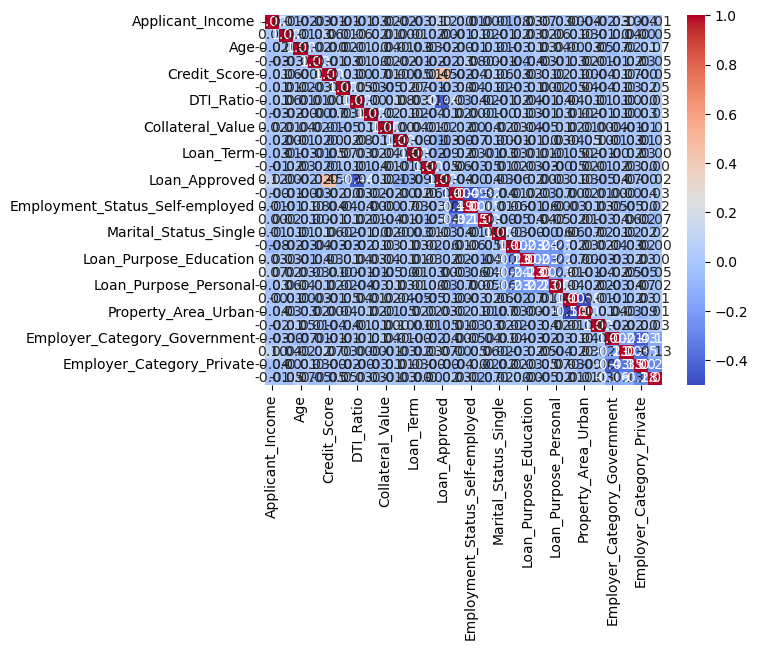

In [130]:
num_cols = df.select_dtypes(include="number")
corr_matrix = num_cols.corr()
corr_matrix    # It will give you the relatiion between all the variables like how they are related to each other ( In liner way ) 

nums_cols.corr()["Loan_Approved"].sort_values(ascending=False)


- What we can conclude from above is :   ( Loan _ Approval ) 
- 1. Creadit_Score ( Most Impactfull among all ) 
- 2. Applicant-Income ( Next most Impactfull )
- 3. DTI_Ratio Impact it in most negative way 

<Axes: >

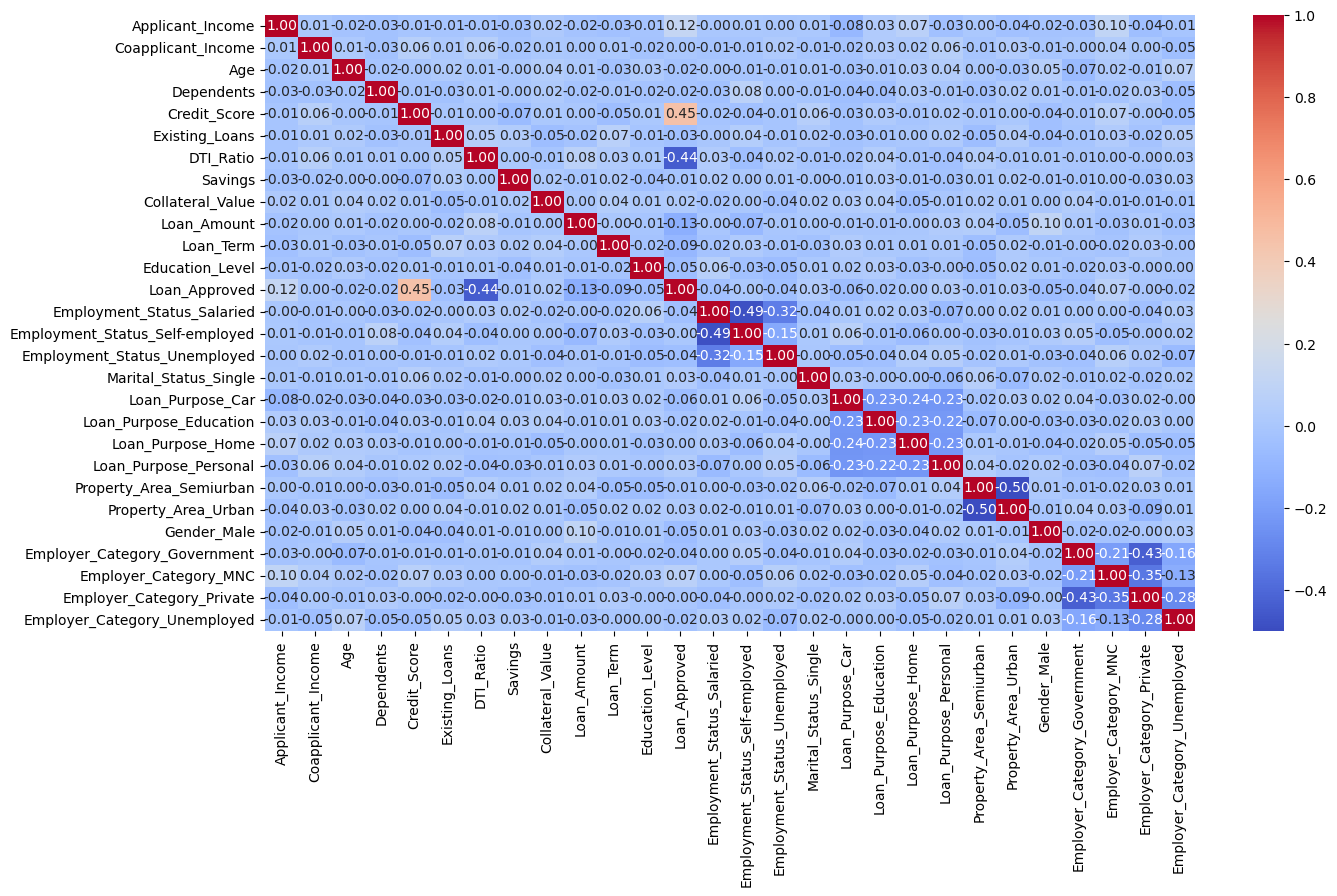

In [134]:
plt.figure(figsize=(15,8))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)

# Train - Test - Split +  Feature Scaling

In [137]:
# This is how we split our input (x) and outut(y) variable

x = df.drop("Loan_Approved", axis=1 )
y = df["Loan_Approved"]
x.head()
y

0      0
1      0
2      1
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: Loan_Approved, Length: 1000, dtype: int64

In [138]:
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [139]:
x_train.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
29,5890.000000,8041.0,31.000000,0.0,603.000000,0.000000,0.11,11906.0,8150.000000,29287.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
535,4779.000000,529.0,50.000000,0.0,614.000000,0.000000,0.21,5369.0,5430.000000,14786.000000,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
695,10852.571579,8927.0,36.000000,0.0,584.000000,4.000000,0.22,3186.0,24802.792632,20522.825263,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
557,2384.000000,2113.0,39.971579,1.0,726.000000,4.000000,0.34,11882.0,48542.000000,13312.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
836,5228.000000,5249.0,42.000000,1.0,676.033684,1.950526,0.18,17669.0,24802.792632,13906.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [140]:
x_test.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
521,13023.0,6675.0,53.000000,3.0,628.0,3.0,0.347263,10051.000000,26309.0,22947.000000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
737,15917.0,6787.0,42.000000,0.0,588.0,4.0,0.410000,922.000000,13476.0,20522.825263,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
740,7560.0,3530.0,52.000000,3.0,606.0,0.0,0.580000,9940.452632,21795.0,5876.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
660,19022.0,574.0,59.000000,0.0,725.0,4.0,0.410000,1463.000000,44498.0,8433.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
411,4967.0,5797.0,39.971579,3.0,697.0,4.0,0.580000,1095.000000,3017.0,33926.000000,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


In [148]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled =  scaler.transform(x_test)

Original data (numpy array):
 [[11  2]
 [ 3  7]
 [ 0 10]
 [11  8]]
Scaled data:
 [[ 0.97596444 -1.61155897]
 [-0.66776515  0.08481889]
 [-1.28416374  1.10264561]
 [ 0.97596444  0.42409446]]


# Train & Evaluate Models

In [177]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

log_model = LogisticRegression()
log_model.fit(x_train_scaled, y_train)

y_pred = log_model.predict(x_test_scaled)

# Evaluation 
print("Logistic Regression Model :  ")
print("Precision : ", precision_score(y_test, y_pred))
print("Recall : ", recall_score(y_test, y_pred))
print("F1 : ", f1_score(y_test, y_pred))
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred), "\n")

print("Note: Precision is what we are looking for this model")

# Precision => How much wrong I am choosing
# Recall => How much right I am missing
# F1 score => Balance between recall and precision  ( Because as recall increases , precision decreases ) 
                                


Logistic Regression Model :  
Precision :  0.7777777777777778
Recall :  0.8032786885245902
F1 :  0.7903225806451613
Accuracy :  0.87
Confusion Matrix : 
 [[125  14]
 [ 12  49]] 

Note: Precision is what we are looking for this model


In [167]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

knn_model = KNeighborsClassifier(n_neighbors=13)
knn_model.fit(x_train_scaled, y_train)

y_pred = knn_model.predict(x_test_scaled)

# Evaluation 
print("KNN Model :  ")
print("Precision : ", precision_score(y_test, y_pred))
print("Recall : ", recall_score(y_test, y_pred))
print("F1 : ", f1_score(y_test, y_pred))
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred), "\n")

print("Note: Precision is what we are looking for this model")

print("Clearly it is sceen that Logistic is working better than KNN, beacuse recall is decreasing")

KNN Model :  
Precision :  0.7317073170731707
Recall :  0.4918032786885246
F1 :  0.5882352941176471
Accuracy :  0.79
Confusion Matrix : 
 [[128  11]
 [ 31  30]] 

Note: Precision is what we are looking for this model
Clearly it is sceen that Logistic is working better than KNN


In [174]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

NB_model = GaussianNB()
NB_model.fit(x_train_scaled, y_train)

y_pred = NB_model.predict(x_test_scaled)

# Evaluation 
print("Naive Bayes Model :  ")
print("Precision : ", precision_score(y_test, y_pred))
print("Recall : ", recall_score(y_test, y_pred))
print("F1 : ", f1_score(y_test, y_pred))
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred), "\n")

print("Note: Precision is what we are looking for this model")

print("Naive Bayes => Better than logistic Regression")

Naive Bayes Model :  
Precision :  0.8235294117647058
Recall :  0.6885245901639344
F1 :  0.75
Accuracy :  0.86
Confusion Matrix : 
 [[130   9]
 [ 19  42]] 

Note: Precision is what we are looking for this model
Naive Bayes => Better than logistic Regression


# Best Model on the Basis of Precision => Naive Bayes

# Feature Engineering

In [181]:
# From the Coorrelation HeatMMap    , 2 Features and getting stand out
# Credit_Score and DTI_Ratio

# To inncrease Impact of this 2 features we can convert them into Polynomial Feature

# Add or Transform features
df["DTI_Ratio_sq"] = df["DTI_Ratio"] ** 2
df["Credit_Score_sq"] = df["Credit_Score"] ** 2

# Sometimes our data is Skewed Data   ( Like some Data points impacting our Data in un usual way )
# To Solve this Issue => Take log of values
# x_log = log(1+x)   => 1 added to prevent log(0) issuse

# df["Applicant_Income_log"] = np.log1p(df["Applicant_Income"])

x = df.drop(columns=["DTI_Ratio","Credit_Score","Loan_Approved",])
y = df["Loan_Approved"]

# Traing Test Split
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scaling ( Feature Scaling ) 
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled =  scaler.transform(x_test)


In [182]:
x_train.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Existing_Loans,Savings,Collateral_Value,Loan_Amount,Loan_Term,Education_Level,...,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed,DTI_Ratio_sq,Credit_Score_sq,Applicant_Income_log
29,5890.000000,8041.0,31.000000,0.0,0.000000,11906.0,8150.000000,29287.000000,12.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0121,363609.000000,8.681181
535,4779.000000,529.0,50.000000,0.0,0.000000,5369.0,5430.000000,14786.000000,72.0,1,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0441,376996.000000,8.472196
695,10852.571579,8927.0,36.000000,0.0,4.000000,3186.0,24802.792632,20522.825263,48.0,1,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0484,341056.000000,9.292249
557,2384.000000,2113.0,39.971579,1.0,4.000000,11882.0,48542.000000,13312.000000,24.0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.1156,527076.000000,7.776954
836,5228.000000,5249.0,42.000000,1.0,1.950526,17669.0,24802.792632,13906.000000,84.0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0324,457021.542187,8.561975


In [183]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

log_model = LogisticRegression()
log_model.fit(x_train_scaled, y_train)

y_pred = log_model.predict(x_test_scaled)

# Evaluation 
print("Logistic Regression Model :  ")
print("Precision : ", precision_score(y_test, y_pred))
print("Recall : ", recall_score(y_test, y_pred))
print("F1 : ", f1_score(y_test, y_pred))
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred), "\n")

print("Note: Precision is what we are looking for this model")

# Precision => How much wrong I am choosing
# Recall => How much right I am missing
# F1 score => Balance between recall and precision  ( Because as recall increases , precision decreases ) 
                                


Logistic Regression Model :  
Precision :  0.7846153846153846
Recall :  0.8360655737704918
F1 :  0.8095238095238095
Accuracy :  0.88
Confusion Matrix : 
 [[125  14]
 [ 10  51]] 

Note: Precision is what we are looking for this model


In [184]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

knn_model = KNeighborsClassifier(n_neighbors=13)
knn_model.fit(x_train_scaled, y_train)

y_pred = knn_model.predict(x_test_scaled)

# Evaluation 
print("KNN Model :  ")
print("Precision : ", precision_score(y_test, y_pred))
print("Recall : ", recall_score(y_test, y_pred))
print("F1 : ", f1_score(y_test, y_pred))
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred), "\n")

print("Note: Precision is what we are looking for this model")

print("Clearly it is sceen that Logistic is working better than KNN, beacuse recall is decreasing")

KNN Model :  
Precision :  0.6744186046511628
Recall :  0.47540983606557374
F1 :  0.5576923076923077
Accuracy :  0.77
Confusion Matrix : 
 [[125  14]
 [ 32  29]] 

Note: Precision is what we are looking for this model
Clearly it is sceen that Logistic is working better than KNN, beacuse recall is decreasing


In [185]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

NB_model = GaussianNB()
NB_model.fit(x_train_scaled, y_train)

y_pred = NB_model.predict(x_test_scaled)

# Evaluation 
print("Naive Bayes Model :  ")
print("Precision : ", precision_score(y_test, y_pred))
print("Recall : ", recall_score(y_test, y_pred))
print("F1 : ", f1_score(y_test, y_pred))
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred), "\n")

print("Note: Precision is what we are looking for this model")

print("Naive Bayes => Better than logistic Regression")

Naive Bayes Model :  
Precision :  0.8113207547169812
Recall :  0.7049180327868853
F1 :  0.7543859649122807
Accuracy :  0.86
Confusion Matrix : 
 [[129  10]
 [ 18  43]] 

Note: Precision is what we are looking for this model
Naive Bayes => Better than logistic Regression
